In [1]:
import astropy.io.fits as fits
import astropy.units as u
import scipy
import poppy
from poppy.poppy_core import PlaneType
#import proper
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':"nearest"})
import os
from pathlib import Path
spc730dir = Path("/Users/edouglas/projects/WFIRST/data/phaseb_data/"+'/spc_20190130'); print(spc730dir)
import logging,sys
_log = logging.getLogger('poppy')
_log.setLevel("DEBUG")
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

lambda_m = 730e-9*u.m
D = 2.3633372*u.m

as_per_lamD = (lambda_m/D*u.radian).to(u.arcsecond); print(as_per_lamD)
fov = 9*as_per_lamD; print(fov)

/Users/edouglas/projects/WFIRST/data/phaseb_data/spc_20190130
0.06371215608182376 arcsec
0.5734094047364139 arcsec


In [2]:
fl_pri = 2.83459423440 * 1.0013*u.m
d_pri_sec = 2.285150515460035*u.m
d_focus_sec = d_pri_sec - fl_pri
fl_sec = -0.653933011 * 1.0004095*u.m
d_sec_focus = 3.580188916677103*u.m
diam_sec = 0.58166*u.m
d_sec_fold1 = 2.993753476654728*u.m
d_fold1_focus = 0.586435440022375*u.m
diam_fold1 = 0.09*u.m
d_fold1_m3 = 1.680935841598811*u.m
fl_m3 = 0.430216463069001*u.m
d_focus_m3 = 1.094500401576436*u.m
d_m3_pupil = 0.469156807701977*u.m
d_m3_focus = 0.708841602661368*u.m
diam_m3 = 0.2*u.m
d_m3_m4 = 0.943514749358944*u.m
fl_m4 = 0.116239114833590*u.m
d_focus_m4 = 0.234673014520402*u.m
d_m4_pupil = 0.474357941656967*u.m
d_m4_focus = 0.230324117970585*u.m
diam_m4 = 0.07*u.m
d_m4_m5 = 0.429145636743193*u.m
d_m5_focus = 0.198821518772608*u.m
fl_m5 = 0.198821518772608*u.m
d_m5_pupil = 0.716529242882632*u.m
diam_m5 = 0.07*u.m
d_m5_fold2 = 0.351125431220770*u.m
diam_fold2 = 0.06*u.m
d_fold2_fsm = 0.365403811661862*u.m
d_fsm_oap1 = 0.354826767220001*u.m
fl_oap1 = 0.503331895563883*u.m
diam_oap1 = 0.06*u.m
d_oap1_focm = 0.768005607094041*u.m
d_focm_oap2 = 0.314483210543378*u.m
fl_oap2 = 0.579156922073536*u.m
diam_oap2 = 0.06*u.m
d_oap2_dm1 = 0.775775726154228*u.m
d_dm1_dm2 = 1.0*u.m
d_dm2_oap3 = 0.394833855161549*u.m
fl_oap3 = 1.217276467668519*u.m
diam_oap3 = 0.06*u.m
d_oap3_fold3 = 0.505329955078121*u.m
diam_fold3 = 0.06*u.m
d_fold3_oap4 = 1.158897671642761*u.m
fl_oap4 = 0.446951159052363*u.m
diam_oap4 = 0.06*u.m
d_oap4_pupilmask = 0.423013568764728*u.m
d_pupilmask_oap5 = 0.408810648253099*u.m
fl_oap5 =  0.548189351937178*u.m
diam_oap5 = 0.06*u.m
d_oap5_fpm = 0.548189083164429*u.m
d_fpm_oap6 = 0.548189083164429*u.m
fl_oap6 = 0.548189083164429*u.m
diam_oap6 = 0.06*u.m
d_oap6_lyotstop = 0.687567667550736*u.m
d_lyotstop_oap7 = 0.401748843470518*u.m
fl_oap7 = 0.708251083480054*u.m
diam_oap7 = 0.06*u.m
d_oap7_fieldstop = 0.708251083480054*u.m  
d_fieldstop_oap8 = 0.210985967281651*u.m
fl_oap8 = 0.210985967281651*u.m
diam_oap8 = 0.06*u.m
d_oap8_pupil = 0.238185804200797*u.m
d_oap8_filter = 0.368452268225530*u.m
diam_filter = 0.01*u.m
d_filter_lens = 0.170799548215162*u.m
fl_lens = 0.246017378417573*u.m + 0.050001306014153*u.m
diam_lens = 0.01*u.m
d_lens_fold4 = 0.246017378417573*u.m
diam_fold4 = 0.02*u.m
d_fold4_image = 0.050001578514650*u.m
fl_pupillens = 0.149260576823040*u.m   

# Define all the optical elements with power.

In [3]:
primary = poppy.QuadraticLens(fl_pri, name='Primary')
secondary = poppy.QuadraticLens(fl_sec, name='Secondary')
m3 = poppy.QuadraticLens(fl_m3, name='M3')
m4 = poppy.QuadraticLens(fl_m4, name='M4')
m5 = poppy.QuadraticLens(fl_m5, name='M5')
oap1 = poppy.QuadraticLens(fl_oap1, name='OAP1')
oap2 = poppy.QuadraticLens(fl_oap2, name='OAP2')
oap3 = poppy.QuadraticLens(fl_oap3, name='OAP3')
oap4 = poppy.QuadraticLens(fl_oap4, name='OAP4')
oap5 = poppy.QuadraticLens(fl_oap5, name='OAP5')
oap6 = poppy.QuadraticLens(fl_oap6, name='OAP6')
oap7 = poppy.QuadraticLens(fl_oap7, name='OAP7')
oap8 = poppy.QuadraticLens(fl_oap8, name='OAP8')
lens = poppy.QuadraticLens(fl_lens, name='LENS')
image = poppy.ScalarTransmission(planetype=PlaneType.intermediate, name='focus')

DEBUG:poppy:Initialized: Primary, fl =2.84e+00 m
DEBUG:poppy:Initialized: Secondary, fl =-6.54e-01 m
DEBUG:poppy:Initialized: M3, fl =4.30e-01 m
DEBUG:poppy:Initialized: M4, fl =1.16e-01 m
DEBUG:poppy:Initialized: M5, fl =1.99e-01 m
DEBUG:poppy:Initialized: OAP1, fl =5.03e-01 m
DEBUG:poppy:Initialized: OAP2, fl =5.79e-01 m
DEBUG:poppy:Initialized: OAP3, fl =1.22e+00 m
DEBUG:poppy:Initialized: OAP4, fl =4.47e-01 m
DEBUG:poppy:Initialized: OAP5, fl =5.48e-01 m
DEBUG:poppy:Initialized: OAP6, fl =5.48e-01 m
DEBUG:poppy:Initialized: OAP7, fl =7.08e-01 m
DEBUG:poppy:Initialized: OAP8, fl =2.11e-01 m
DEBUG:poppy:Initialized: LENS, fl =2.96e-01 m


# Define the initial telescope pupil, the pupil mask, the FPM, and the lyot stop.

/home/u21/kianmilani/Documents/webbpsf-mydev/spc_20190130
DEBUG:poppy:Trans: /home/u21/kianmilani/Documents/webbpsf-mydev/spc_20190130/pupil_SPC-20190130_rotated.fits
DEBUG:poppy:OPD: None
INFO:poppy:Roman Pupil: Loaded amplitude transmission from /home/u21/kianmilani/Documents/webbpsf-mydev/spc_20190130/pupil_SPC-20190130_rotated.fits
DEBUG:poppy:  Getting pixel scale from user-provided float value: 0.0023633372
0.0023633372 m / pix
DEBUG:poppy:Trans: /home/u21/kianmilani/Documents/webbpsf-mydev/spc_20190130/SPM_SPC-20190130.fits
DEBUG:poppy:OPD: None
INFO:poppy:Shaped Pupil Mask: Loaded amplitude transmission from /home/u21/kianmilani/Documents/webbpsf-mydev/spc_20190130/SPM_SPC-20190130.fits
DEBUG:poppy:  Getting pixel scale from user-provided float value: 1.70005966366624e-05
1.70005966366624e-05 m / pix
DEBUG:poppy:Trans: /home/u21/kianmilani/Documents/webbpsf-mydev/spc_20190130/FPM_res100_SPC-20190130.fits
DEBUG:poppy:OPD: None
INFO:poppy:Focal Plane Mask: Loaded amplitude transm

(<matplotlib.axes._subplots.AxesSubplot at 0x2aabd47e6ac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2aabd4853d68>)

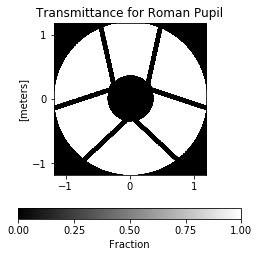

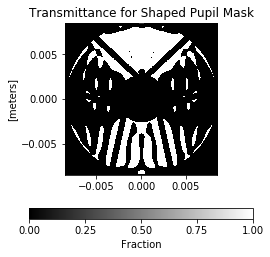

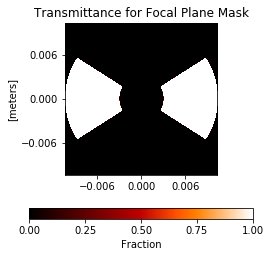

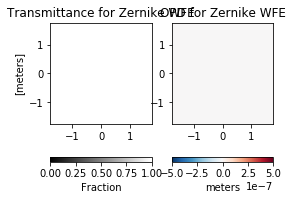

In [7]:
spc730dir = Path(os.getcwd()+'/spc_20190130'); print(spc730dir)

pupil_fpath = str(spc730dir/'pupil_SPC-20190130_rotated.fits')
spm_fpath = str(spc730dir/'SPM_SPC-20190130.fits')
fpm_fpath = str(spc730dir/'FPM_res100_SPC-20190130.fits')
ls_fpath = str(spc730dir/'LS_SPC-20190130.fits')

pupil = poppy.FITSOpticalElement('Roman Pupil',
                                 pupil_fpath, pixelscale=0.0023633372,
                                 planetype=PlaneType.pupil)
print(pupil.pixelscale)
SPM = poppy.FITSOpticalElement('Shaped Pupil Mask', spm_fpath,
                               pixelscale=1.70005966366624e-05,
                               planetype=PlaneType.pupil)
print(SPM.pixelscale)
FPM = poppy.FITSOpticalElement('Focal Plane Mask', fpm_fpath, 
                               pixelscale= 1.149386e-05,
                               planetype=PlaneType.intermediate); print(FPM.pixelscale)
LS = poppy.FITSOpticalElement('Lyot Stop', ls_fpath, 
                              pixelscale=1.7000357988404796e-05,
                              planetype=PlaneType.pupil); print(LS.pixelscale)

figwidth = 4
figheight = 4
plt.figure(figsize=(figwidth,figheight)); pupil.display()
plt.figure(figsize=(figwidth,figheight)); SPM.display()
plt.figure(figsize=(figwidth,figheight)); FPM.display()
plt.figure(figsize=(figwidth,figheight)); LS.display()

dm1_fpath = str(spc730dir/'spc-spec_long_with_aberrations_dm1.fits')
dm2_fpath = str(spc730dir/'spc-spec_long_with_aberrations_dm2.fits')

use_dms = False
use_fieldstop = False

if use_dms:
    dm1 = poppy.FITSOpticalElement('DM1', opd=dm1_fpath, opdunits='meters',
                                   planetype=PlaneType.intermediate)
    dm2 = poppy.FITSOpticalElement('DM2',opd=dm2_fpath, opdunits='meters',
                                   planetype=PlaneType.intermediate)

    figwidth = 4
    figheight = 4
    plt.figure(figsize=(figwidth,figheight)); dm1.display(what='both')
    plt.figure(figsize=(figwidth,figheight)); dm2.display(what='both')
    
if use_fieldstop:
    fieldstop = poppy.CircularAperture('Field Stop Plane (Circular Aperture)', radius=focal_plane_diam.value/4)
    
xtilt = 0*1e-9 # I have not converted the offset in LambdaD to the corresponding zernike
ytilt = 0

# proper.prop_multiply( wavefront, np.exp(complex(0,1) * np.pi * (xtilt_lam * x + ytilt_lam * y)) )
tilt = poppy.ZernikeWFE(radius=D/2, 
                        coefficients=[0, xtilt, ytilt],
                        aperture_stop=False)
tilt.display(what='both')

# Initialize the Fresnel Optical System and add all the optical elements, pupil planes, and focal planes.

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added optic: Roman Pupil after separation: 0.00e+00 m 
INFO:poppy:Added optic: Zernike WFE after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary after separation: 2.29e+00 m 
INFO:poppy:Added optic: Secondary aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: M3 after separation: 4.67e+00 m 
INFO:poppy:Added optic: M-3 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: M4 after separation: 9.44e-01 m 
INFO:poppy:Added optic: M-4 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: M5 after separation: 4.29e-01 m 
INFO:poppy:Added optic: M-5 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: OAP1 after separation: 1.07e+00 m 
INFO:poppy:Added optic: OAP1 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: OAP2 after separation: 1.08e+00 m 
INFO:poppy:Added optic: OAP2 aperture after separation: 0.

DEBUG:poppy:1/fl=-1.5286e+00 1 / m
DEBUG:poppy:1.0/(R_input_beam)=-1.8079e+00 1 / m
DEBUG:poppy:1.0/(self.z-self.z_w0)=-2.7931e-01 1 / m
DEBUG:poppy:Applying spherical phase curvature =1.72e+10 m
DEBUG:poppy:Applying spherical lens phase =5.81e-11 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Secondary
DEBUG:poppy:------ Optic: Secondary applied ------
DEBUG:poppy:  Propagating wavefront to Optic: Secondary aperture after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Optic: Secondary aperture
DEBUG:poppy:  Propagating wavefront to Lens: M3, with focal length 0.430216463069001 m after distance 4.674689318253539 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 5.865339431365685 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 0.0004605711833061476 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=3.58018891590565 m
DEBUG:poppy:using numpy FFT of (2000, 2000) array, FFT_direction=forward
DEBU

DEBUG:poppy:  Propagating wavefront to Optic: M-5 aperture after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Optic: M-5 aperture
DEBUG:poppy:  Propagating wavefront to Lens: OAP1, with focal length 0.503331895563883 m after distance 1.071356010102633 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 18.8232140328767 m
DEBUG:poppy:  Plane to Plane Regime, dz=1.071356010102633 m
DEBUG:poppy:  Constant Pixelscale: 4.0238841006034565e-05 m / pix
DEBUG:poppy:using numpy FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.204658 s, full function  in 0.214 s
DEBUG:poppy:using numpy FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.170368 s, full function  in 0.180 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 9.40e+00 m ------
DEBUG:poppy:------ Applying Lens: OAP1 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:2.012e-02 m, z_w0=1.882e+01 m
z=9.404e+00 m, z_r=1.742e+03 m
DEBUG:p

DEBUG:poppy:Output beam focal length is now -0.0 m
DEBUG:poppy:Spherical to Planar.
DEBUG:poppy:Applying spherical phase curvature =-5.89e+05 m
DEBUG:poppy:Applying spherical lens phase =-1.70e-06 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP4
DEBUG:poppy:------ Optic: OAP4 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: OAP4 aperture after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP4 aperture
DEBUG:poppy:  Propagating wavefront to Pupil plane: Shaped Pupil Mask  after distance 0.423013568764728 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 14.932241851718045 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.423013568764728 m
DEBUG:poppy:  Constant Pixelscale: 1.7000379740380806e-05 m / pix
DEBUG:poppy:using numpy FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.216421 s, full function  in 0.226 s
DEBUG:poppy:using numpy FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.

DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:8.500e-03 m, z_w0=1.726e+01 m
z=1.734e+01 m, z_r=3.109e+02 m
DEBUG:poppy:  Beam radius at OAP7 =8.50e-03 m
DEBUG:poppy: input flat wavefront and OAP7 has output beam curvature of =-7.08e-01 m
DEBUG:poppy:OAP7 has a curvature of =-7.08e-01 m
DEBUG:poppy:OAP7 has a curved output wavefront, with waist at 18.046948558937835 m
DEBUG:poppy:Post Optic Parameters:w_0:1.936e-05 m, z_w0=1.805e+01 m
z=1.734e+01 m, z_r=1.613e-03 m
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -0.708251083480054 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:Applying spherical phase curvature =1.37e+05 m
DEBUG:poppy:Applying spherical lens phase =7.33e-06 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP7
DEBUG:poppy:------ Optic: OAP7 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: OAP7 aperture after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phaso

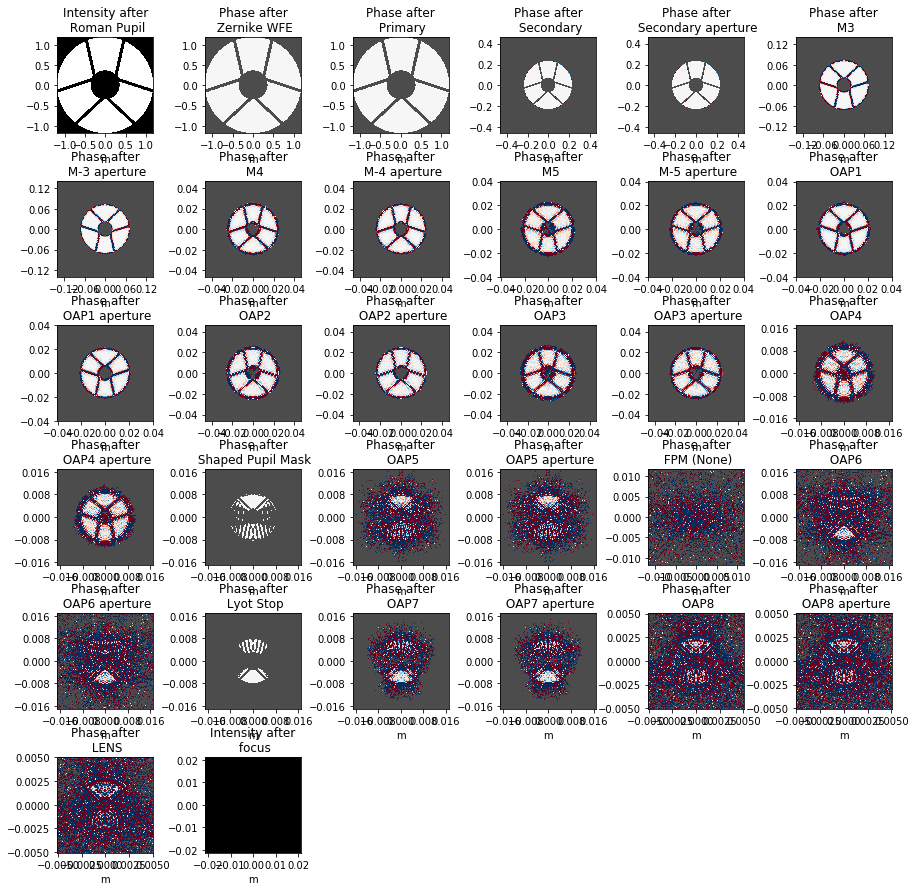

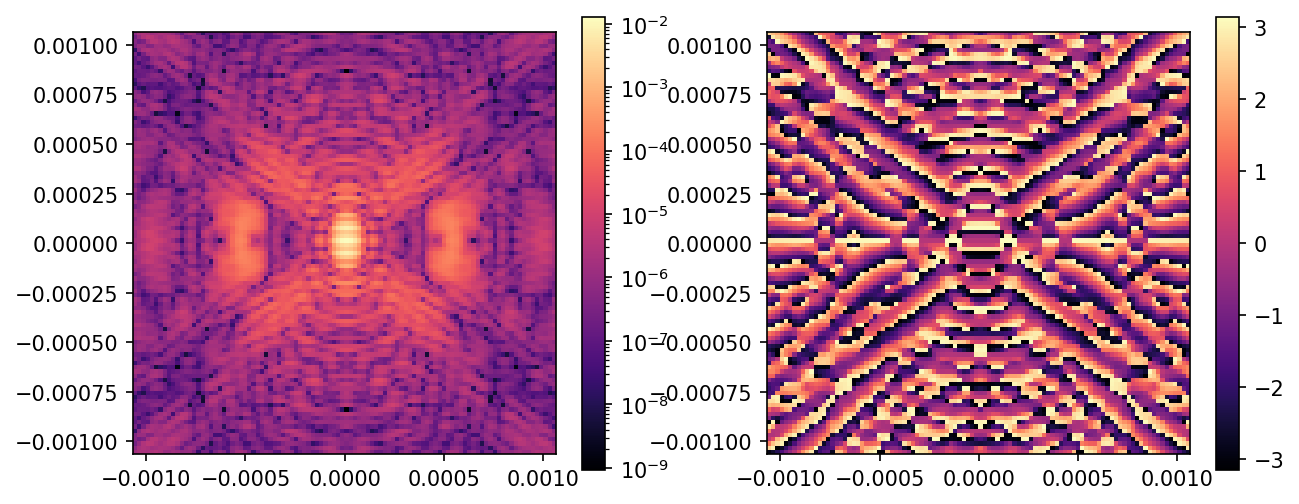

In [6]:
# create the optical system
npix = 1000
oversample = 2
beam_ratio = 1/oversample

spc = poppy.FresnelOpticalSystem(pupil_diameter=D,
                                 npix=npix, beam_ratio=beam_ratio, verbose=True)
spc.add_optic(pupil)

spc.add_optic(tilt)

spc.add_optic(primary)

spc.add_optic(secondary, distance=d_pri_sec)
spc.add_optic(poppy.CircularAperture(radius=diam_sec/2,name="Secondary aperture"))

spc.add_optic(m3, distance=d_sec_fold1 + d_fold1_m3)
spc.add_optic(poppy.CircularAperture(radius=diam_m3/2,name="M-3 aperture"))

spc.add_optic(m4, distance=d_m3_m4)
spc.add_optic(poppy.CircularAperture(radius=diam_m4/2,name="M-4 aperture"))

spc.add_optic(m5, distance=d_m4_m5)
spc.add_optic(poppy.CircularAperture(radius=diam_m5/2,name="M-5 aperture"))

spc.add_optic(oap1, distance=d_m5_fold2 + d_fold2_fsm + d_fsm_oap1)
spc.add_optic(poppy.CircularAperture(radius=diam_oap1/2,name="OAP1 aperture"))

if use_dms:
    spc.add_optic(oap2, distance=d_oap1_focm + d_focm_oap2)
    spc.add_optic(poppy.CircularAperture(radius=diam_oap2/2,name="OAP2 aperture"))

    spc.add_optic(dm1, distance=d_oap2_dm1) # now to the DMs
    spc.add_optic(dm2, distance=d_dm1_dm2)

    spc.add_optic(oap3, distance=d_dm2_oap3)
else:
    spc.add_optic(oap2, distance=d_oap1_focm + d_focm_oap2)
    spc.add_optic(poppy.CircularAperture(radius=diam_oap2/2,name="OAP2 aperture"))
    
    spc.add_optic(oap3, distance=d_oap2_dm1 + d_dm1_dm2 + d_dm2_oap3)
spc.add_optic(poppy.CircularAperture(radius=diam_oap3/2,name="OAP3 aperture"))

spc.add_optic(oap4, distance=d_oap3_fold3 + d_fold3_oap4)
spc.add_optic(poppy.CircularAperture(radius=diam_oap4/2,name="OAP4 aperture"))

spc.add_optic(SPM, distance=d_oap4_pupilmask + 0)#0.188*u.m) # why add 0.188

spc.add_optic(oap5, distance=d_pupilmask_oap5)
spc.add_optic(poppy.CircularAperture(radius=diam_oap5/2,name="OAP5 aperture"))

use_fpm = False
if use_fpm:
    spc.add_optic(FPM, distance=d_oap5_fpm)
    spc.add_optic(oap6, distance=d_fpm_oap6)
else:
    spc.add_optic(poppy.CircularAperture(radius=diam_oap5/2,name="FPM (None)"), distance=d_oap5_fpm)
    spc.add_optic(oap6, distance=d_fpm_oap6)
spc.add_optic(poppy.CircularAperture(radius=diam_oap6/2,name="OAP6 aperture"))

spc.add_optic(LS, distance=d_oap6_lyotstop)

spc.add_optic(oap7, distance=d_lyotstop_oap7)
spc.add_optic(poppy.CircularAperture(radius=diam_oap7/2,name="OAP7 aperture"))

if use_fieldstop:
    spc.add_optic(fieldstop, distance=d_oap7_fieldstop)
    spc.add_optic(oap8, distance=d_fieldstop_oap8)
else:
    spc.add_optic(oap8, distance=d_oap7_fieldstop + d_fieldstop_oap8)
spc.add_optic(poppy.CircularAperture(radius=diam_oap8/2,name="OAP8 aperture"))

spc.add_optic(lens, distance=d_oap8_filter + d_filter_lens)

spc.add_optic(image, distance=d_lens_fold4 + d_fold4_image)

spc.describe()

plt.figure(figsize=(15,15))
plt.subplots_adjust(left=None, bottom=None,
                    right=None, top=None, wspace=0.5, hspace=0.5)
spc.verbose=True
psf, wfs = spc.calc_psf(wavelength=lambda_m,
                        display_intermediates=True, 
                        return_intermediates=True,)
n = wfs[-1].shape[0]
dim = round(n/20)
lim1 = int(n/2 - dim/2)
lim2 = int(n/2 + dim/2)

wf_int = wfs[-1].intensity[lim1:lim2,lim1:lim2]
wf_phs = wfs[-1].phase[lim1:lim2,lim1:lim2]
n = wf_int.shape[0]
ext = wfs[-1].pixelscale.value * n/2
extent = [-ext,ext,-ext,ext]

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4),dpi=150)
im1=ax[0].imshow(wf_int, norm=LogNorm(), extent=extent, cmap='magma')
fig.colorbar(im1,ax=ax[0])
im2=ax[1].imshow(wf_phs, extent=extent, cmap='magma')
fig.colorbar(im2,ax=ax[1])

# Calculate the PSF and display.

In [9]:
save_wfs = [0, 0, 1, 0, 1, 0,
            1, 0, 1, 0, 1, 0, 
            1, 0, 1, 0, 1, 0,
            1, 1, 0, 1, 1, 0,
            1, 1, 0, 1, 0, 1,
            1, 1]
wf_fnames = ['wf_primary', 'wf_secondary', 'wf_m3', 'wf_m4', 'wf_m5', 'wf_oap1', 'wf_oap2',
             'wf_oap3', 'wf_oap4', 'wf_spm', 'wf_oap5', 'wf_fpm', 'wf_oap6', 'wf_lyotstop',
             'wf_oap7', 'wf_oap8', 'wf_lens', 'wf_image']
print(len(wfs), len(wf_fnames))

n = wfs[-1].intensity.shape[0]
wavefront = np.zeros(shape=(2,n,n))
count = 0
for i,wf in enumerate(wfs):
    if save_wfs[i] == 1:
        wavefront[0,:,:] = wf.intensity
        wavefront[1,:,:] = wf.phase

        wf_fpath = 'spc730-fresnel-wavefronts/' + wf_fnames[count] + '_poppy' + '.fits'
        print(i, wf_fpath)
        hdr = fits.Header()
        hdr['PIXELSCL'] = wf.pixelscale.value
        wf_hdu = fits.PrimaryHDU(wavefront, header=hdr)
        wf_hdu.writeto(wf_fpath, overwrite=True)
        
        count+=1

32 18
2 spc730-fresnel-wavefronts/wf_primary_poppy.fits
4 spc730-fresnel-wavefronts/wf_secondary_poppy.fits
6 spc730-fresnel-wavefronts/wf_m3_poppy.fits
8 spc730-fresnel-wavefronts/wf_m4_poppy.fits
10 spc730-fresnel-wavefronts/wf_m5_poppy.fits
12 spc730-fresnel-wavefronts/wf_oap1_poppy.fits
14 spc730-fresnel-wavefronts/wf_oap2_poppy.fits
16 spc730-fresnel-wavefronts/wf_oap3_poppy.fits
18 spc730-fresnel-wavefronts/wf_oap4_poppy.fits
19 spc730-fresnel-wavefronts/wf_spm_poppy.fits
21 spc730-fresnel-wavefronts/wf_oap5_poppy.fits
22 spc730-fresnel-wavefronts/wf_fpm_poppy.fits
24 spc730-fresnel-wavefronts/wf_oap6_poppy.fits
25 spc730-fresnel-wavefronts/wf_lyotstop_poppy.fits
27 spc730-fresnel-wavefronts/wf_oap7_poppy.fits
29 spc730-fresnel-wavefronts/wf_oap8_poppy.fits
30 spc730-fresnel-wavefronts/wf_lens_poppy.fits
31 spc730-fresnel-wavefronts/wf_image_poppy.fits


In [43]:
spcwf=wfs[20].focal_length
[wfs[i].spherical for i in range(len(wfs))]
wfs[16].focal_length

<Quantity -0. m>

DEBUG:poppy:Initialized: Primary, fl =2.84e+00 m
DEBUG:poppy:Initialized: Secondary, fl =-6.54e-01 m
DEBUG:poppy:Initialized: M3, fl =4.30e-01 m
DEBUG:poppy:Initialized: M4, fl =1.16e-01 m
DEBUG:poppy:Initialized: M5, fl =1.99e-01 m
DEBUG:poppy:Initialized: OAP1, fl =5.03e-01 m
DEBUG:poppy:Initialized: OAP2, fl =5.79e-01 m
DEBUG:poppy:Initialized: OAP3, fl =1.22e+00 m
DEBUG:poppy:Initialized: OAP4, fl =4.47e-01 m
DEBUG:poppy:Initialized: OAP5, fl =5.48e-01 m
DEBUG:poppy:Initialized: OAP6, fl =5.48e-01 m
DEBUG:poppy:Initialized: OAP7, fl =7.08e-01 m
DEBUG:poppy:Initialized: OAP8, fl =2.11e-01 m
DEBUG:poppy:Initialized: LENS, fl =2.96e-01 m
/home/u21/kianmilani/Documents/webbpsf-mydev/spc_20190130
DEBUG:poppy:Trans: /home/u21/kianmilani/Documents/webbpsf-mydev/spc_20190130/pupil_SPC-20190130_rotated.fits
DEBUG:poppy:OPD: None
INFO:poppy:Roman Pupil: Loaded amplitude transmission from /home/u21/kianmilani/Documents/webbpsf-mydev/spc_20190130/pupil_SPC-20190130_rotated.fits
DEBUG:poppy:  G

INFO:poppy:Added optic: focus after separation: 2.96e-01 m 
	Entrance pupil diam:  2.3633372 m	npix: 1000	Beam ratio:0.5
	Pupil plane: Roman Pupil 
	Pupil plane: Zernike WFE
	Lens: Primary, with focal length 2.83827920690472 m
	Propagation distance:  2.285150515460035 m
	Lens: Secondary, with focal length -0.6542007965680045 m
	Optic: Secondary aperture
	Propagation distance:  4.674689318253539 m
	Lens: M3, with focal length 0.430216463069001 m
	Optic: M-3 aperture
	Propagation distance:  0.943514749358944 m
	Lens: M4, with focal length 0.11623911483359 m
	Optic: M-4 aperture
	Propagation distance:  0.429145636743193 m
	Lens: M5, with focal length 0.198821518772608 m
	Optic: M-5 aperture
	Propagation distance:  1.071356010102633 m
	Lens: OAP1, with focal length 0.503331895563883 m
	Optic: OAP1 aperture
	Propagation distance:  1.082488817637419 m
	Lens: OAP2, with focal length 0.579156922073536 m
	Optic: OAP2 aperture
	Propagation distance:  2.170609581315777 m
	Lens: OAP3, with focal l

/home/u21/kianmilani/anaconda3/envs/astroconda/lib/python3.6/site-packages/poppy/poppy_core.py:2562: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(nrows, 2, row * 2 - 1)
/home/u21/kianmilani/anaconda3/envs/astroconda/lib/python3.6/site-packages/poppy/poppy_core.py:2565: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot(nrows, 2, row * 2)


DEBUG:poppy:  Padded with a 499 x 499 border to  match the desired shape
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Roman Pupil 
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_man

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Khmer OS System' (KhmerOS_sys.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Devanagari' (Lohit-Devanagari.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'PakTypeTehreer' (PakTypeTehreer.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'PakTypeNaqsh' (PakTypeNaqsh.ttf) normal normal 400 normal>) = 10.05
DEBUG:mat

DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplot

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Italic.ttf) italic normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Gujarati' (Lohit-Gujarati.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Caladea' (Caladea-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tibetan Machine Uni' (TibMachUni-1.901b.ttf) normal normal 400 normal>) = 10.05
D

DEBUG:poppy:1.0/(self.z-self.z_w0)=-1.4108e+00 1 / m
DEBUG:poppy:Applying spherical phase curvature =2.52e+08 m
DEBUG:poppy:Applying spherical lens phase =3.96e-09 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: M3
DEBUG:poppy:------ Optic: M3 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: M-3 aperture after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Optic: M-3 aperture
DEBUG:poppy:  Propagating wavefront to Lens: M4, with focal length 0.11623911483359 m after distance 0.943514749358944 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 7.668681434059704 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 0.00014080132565041052 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.7088416003461306 m
DEBUG:poppy:using numpy FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.178249 s, full function  in 0.189 s
DEBUG:poppy:Applying spherical phase curvat

DEBUG:poppy:Applying spherical phase curvature =5.79e-01 m
DEBUG:poppy:Applying spherical lens phase =1.73e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using numpy FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.167984 s, full function  in 0.178 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.05e+01 m ------
DEBUG:poppy:------ Applying Lens: OAP2 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:5.813e-06 m, z_w0=9.907e+00 m
z=1.049e+01 m, z_r=1.454e-04 m
DEBUG:poppy:  Beam radius at OAP2 =2.32e-02 m
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:5.813e-06 m, z_w0=9.907e+00 m
z=1.049e+01 m, z_r=1.454e-04 m
DEBUG:poppy: input curved wavefront and OAP2 has output beam curvature of =-4.27e+06 m
DEBUG:poppy:OAP2 has a curvature of =-4.27e+06 m
DEBUG:poppy:OAP2 has a curved output wavefront, with waist at 11.73190667890835 m
DEBUG:poppy:Post Optic Parameters:w_0:2

DEBUG:poppy:Applying spherical phase curvature =1.76e+05 m
DEBUG:poppy:Applying spherical lens phase =5.67e-06 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP5
DEBUG:poppy:------ Optic: OAP5 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: OAP5 aperture after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP5 aperture
DEBUG:poppy:  Propagating wavefront to Optic: FPM (None) after distance 0.548189083164429 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 15.701194120704745 m
DEBUG:poppy:  Spherical to Plane Regime, outside Z_R to inside Z_R
DEBUG:poppy:Spherical to Waist propagation, dz=0.5481876480944976 m
DEBUG:poppy:using numpy FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.169709 s, full function  in 0.180 s
DEBUG:poppy:Applying spherical phase curvature =5.48e-01 m
DEBUG:poppy:Applying spherical lens phase =1.82e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Op

DEBUG:poppy:OAP8 has a curved output wavefront, with waist at 18.531776282806845 m
DEBUG:poppy:Post Optic Parameters:w_0:2.532e-03 m, z_w0=1.853e+01 m
z=1.826e+01 m, z_r=2.759e+01 m
DEBUG:poppy:Magnification: -13179.957733668853  from R_in = 0.2109896417842272 m, R_out = -2780.834560958046 m
DEBUG:poppy:Output beam focal length is now -0.0 m
DEBUG:poppy:Spherical to Planar.
DEBUG:poppy:Applying spherical phase curvature =-1.21e+04 m
DEBUG:poppy:Applying spherical lens phase =-8.25e-05 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP8
DEBUG:poppy:------ Optic: OAP8 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: OAP8 aperture after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP8 aperture
DEBUG:poppy:  Propagating wavefront to Lens: LENS, with focal length 0.296018684431726 m after distance 0.539251816440692 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 18.531776282806845 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.539251816440692 m
DEBU

/home/u21/kianmilani/Documents/webbpsf-mydev/Roman_POPPY_SPC730_model.py:283: UserWarning: Attempting to set identical bottom == top == 0.021331676267332646 results in singular transformations; automatically expanding.
  im = ax[0].imshow(image, norm=LogNorm(), extent=im_ext, cmap='magma')
/home/u21/kianmilani/Documents/webbpsf-mydev/Roman_POPPY_SPC730_model.py:287: UserWarning: Attempting to set identical bottom == top == 0.0010665838133666324 results in singular transformations; automatically expanding.
  im = ax[1].imshow(image_trimmed, norm=LogNorm(), extent=im_ext/trim, cmap='magma')


4 spc730-fresnel-wavefronts/wf_secondary_poppy.fits
6 spc730-fresnel-wavefronts/wf_m3_poppy.fits
8 spc730-fresnel-wavefronts/wf_m4_poppy.fits
10 spc730-fresnel-wavefronts/wf_m5_poppy.fits
12 spc730-fresnel-wavefronts/wf_oap1_poppy.fits
14 spc730-fresnel-wavefronts/wf_oap2_poppy.fits
16 spc730-fresnel-wavefronts/wf_oap3_poppy.fits
18 spc730-fresnel-wavefronts/wf_oap4_poppy.fits
19 spc730-fresnel-wavefronts/wf_spm_poppy.fits
21 spc730-fresnel-wavefronts/wf_oap5_poppy.fits
22 spc730-fresnel-wavefronts/wf_fpm_poppy.fits
24 spc730-fresnel-wavefronts/wf_oap6_poppy.fits
25 spc730-fresnel-wavefronts/wf_lyotstop_poppy.fits
27 spc730-fresnel-wavefronts/wf_oap7_poppy.fits
29 spc730-fresnel-wavefronts/wf_oap8_poppy.fits
30 spc730-fresnel-wavefronts/wf_lens_poppy.fits
31 spc730-fresnel-wavefronts/wf_image_poppy.fits


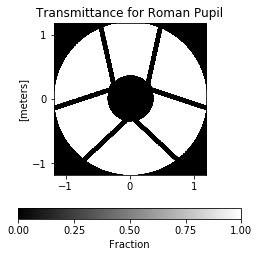

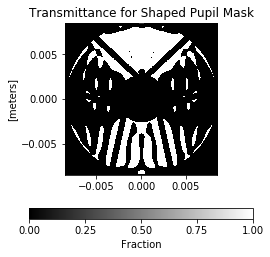

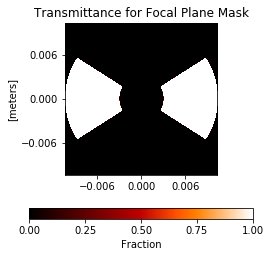

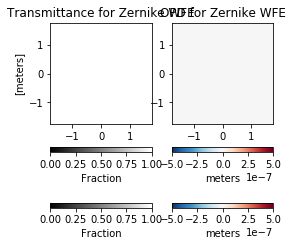

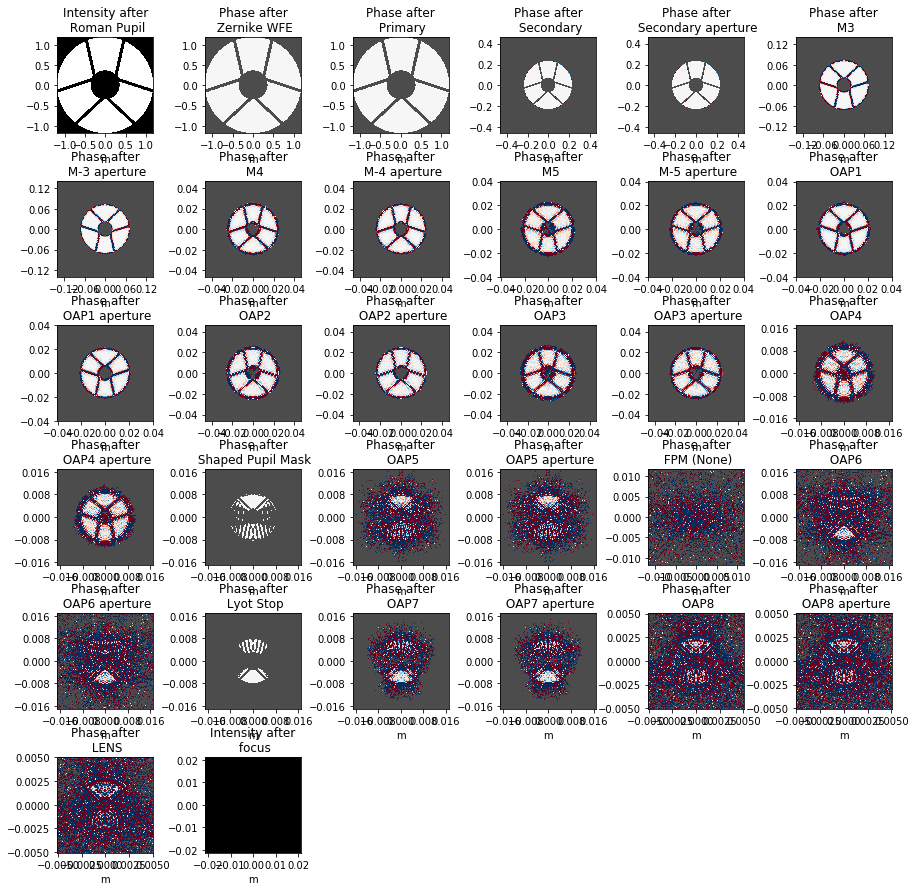

DEBUG:matplotlib.ticker:vmin 4.376155019523786e-17 vmax 0.013011269786594708
DEBUG:matplotlib.ticker:ticklocs array([1.e-19, 1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05,
       1.e-03, 1.e-01, 1.e+01])
DEBUG:matplotlib.ticker:vmin 9.370145057025427e-10 vmax 0.013011269786594708
DEBUG:matplotlib.ticker:ticklocs array([1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02])
DEBUG:matplotlib.ticker:vmin 4.376155019523786e-17 vmax 0.013011269786594708
DEBUG:matplotlib.ticker:ticklocs array([1.e-19, 1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05,
       1.e-03, 1.e-01, 1.e+01])
DEBUG:matplotlib.ticker:vmin 4.376155019523786e-17 vmax 0.013011269786594708
DEBUG:matplotlib.ticker:ticklocs array([1.e-19, 1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05,
       1.e-03, 1.e-01, 1.e+01])
DEBUG:matplotlib.ticker:vmin 4.376155019523786e-17 vmax 0.013011269786594708
DEBUG:matplotlib.font_manager:findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weigh

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Assamese' (Lohit-Assamese.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.otf) normal normal bold normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree-Bold.ttf)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 11.335
D

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Caladea' (Caladea-Italic.ttf) italic normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Unikurd Web' (Unikuweb.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'AR PL UMing CN' (uming.ttc) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 10.15
DEBUG:matplotlib.font_manager:findfont: 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold no

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Abyssinica SIL' (Abyssinica_SIL.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Padauk' (Padauk-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'UnDotum' (UnDotum.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberati

DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold norm

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tibetan Machine Uni' (TibMachUni-1.901b.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Oriya' (Lohit-Oriya.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed.ttf) normal normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.otf) italic normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'WenQuanYi Zen Hei' (wqy-zenhei.ttc) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: Matching :family=STIXNonUnicode:style=italic:va

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-BoldItalic.ttf) italic normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Punjabi' (Lohit-Punjabi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Meera' (Meera.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-ExtraLight.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'UnDotum' (UnDotum.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Telugu' (Lohit-Telugu.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Khmer OS Content' (KhmerOS_content.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'UnDotum' (UnDotumBold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) obliq

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'WenQuanYi Zen Hei' (wqy-zenhei.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: Matching :family=STIXSizeThreeSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXSizeThreeSym ('/home/u21/kianmilani/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf') with score of 0.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=STIXSizeFourSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfo

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Assamese' (Lohit-Assamese.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Khmer OS System' (KhmerOS_sys.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Devanagari' (Lohit-Devanagari.ttf) normal normal 400 normal>) = 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:m

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Unikurd Web' (Unikuweb.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'AR PL UMing CN' (uming.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Italic.ttf) italic normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplot

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Caladea' (Caladea-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-BoldItalic.ttf) italic normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Punjabi' (Lohit-Punjabi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 4

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold no

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Abyssinica SIL' (Abyssinica_SIL.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Padauk' (Padauk-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'UnDotum' (UnDotum.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberati

DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 norma

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Oriya' (Lohit-Oriya.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed.ttf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal bold condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'WenQuanYi Zen Hei' (wqy-zenhei.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: Matching :family=cmtt10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmtt10 ('/home/u21/kianmilani/anaconda3/envs/astroconda/lib/python3.6/site-packages/ma

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Assamese' (Lohit-Assamese.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal bol

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBU

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Caladea' (Caladea-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Unikurd Web' (Unikuweb.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'AR PL UMing CN' (uming.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.fon

DEBUG:matplotlib.font_manager:findfont: score(<Font 'UnDotum' (UnDotumBold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) oblique normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Bold.ttf) normal normal bold condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed.ttf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Caladea' (Caladea-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.fo

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Devanagari' (Lohit-Devanagari.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'PakTypeTehreer' (PakTypeTehreer.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'PakTypeNaqsh' (PakTypeNaqsh.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Abyssinica SIL' (Abyssinica_SIL.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Padauk' (Padauk-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manage

DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Gujarati' (Lohit-Gujarati.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Caladea' (Caladea-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tibetan Machine Uni' (TibMachUni-1.901b.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Oriya' (Lohit-Oriya.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed.ttf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal no

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Punjabi' (Lohit-Punjabi.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Meera' (Meera.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-ExtraLight.ttf) normal normal light normal>) = 1.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 11.335
DEBUG

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.0
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.0
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal n

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-BoldItalic.ttf) italic normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Punjabi' (Lohit-Punjabi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Meera' (Meera.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-ExtraLight.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal no

DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05

DEBUG:matplotlib.font_manager:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Padauk' (Padauk-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'UnDotum' (UnDotum.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Telugu' (Lohit-Telugu.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'L

DEBUG:matplotlib.ticker:vmin 4.376155019523786e-17 vmax 0.013011269786594708
DEBUG:matplotlib.ticker:ticklocs array([1.e-19, 1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05,
       1.e-03, 1.e-01, 1.e+01])
DEBUG:matplotlib.ticker:vmin 4.376155019523786e-17 vmax 0.013011269786594708
DEBUG:matplotlib.ticker:vmin 9.370145057025427e-10 vmax 0.013011269786594708
DEBUG:matplotlib.ticker:ticklocs array([1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02])
DEBUG:matplotlib.ticker:vmin 9.370145057025427e-10 vmax 0.013011269786594708
DEBUG:matplotlib.ticker:ticklocs array([1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02])
DEBUG:matplotlib.ticker:vmin 9.370145057025427e-10 vmax 0.013011269786594708
DEBUG:matplotlib.ticker:ticklocs array([], dtype=float64)
DEBUG:matplotlib.ticker:vmin 9.370145057025427e-10 vmax 0.013011269786594708
DEBUG:matplotlib.ticker:ticklocs array([1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02])
DEBUG:matplotlib.ticker:vmin 

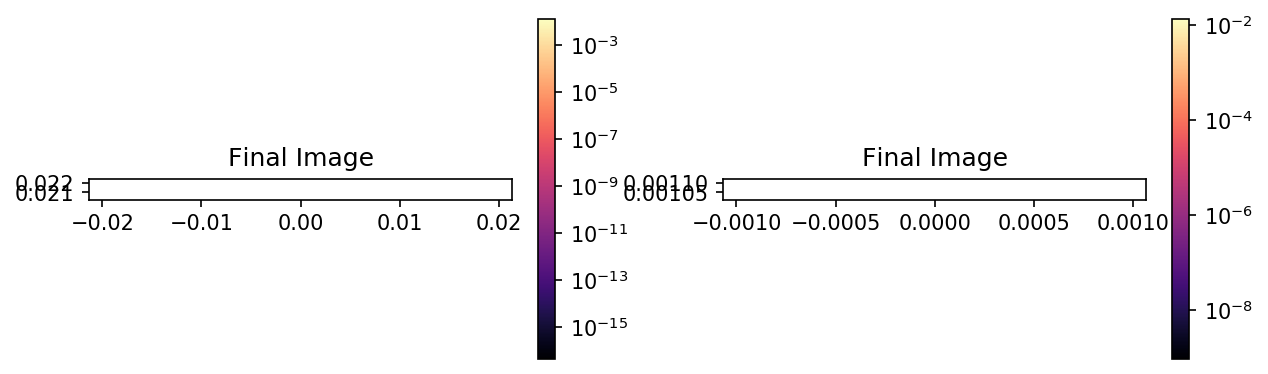

In [1]:
import Roman_POPPY_SPC730_model